In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('loan_trans.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74364 entries, 0 to 74363
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    74364 non-null  int64  
 1   loan_id       74364 non-null  int64  
 2   trans_id      74364 non-null  int64  
 3   trans_amount  74364 non-null  float64
 4   balance       74364 non-null  float64
 5   k_symbol      38411 non-null  object 
 6   loan_amount   74364 non-null  int64  
 7   status        74364 non-null  object 
 8   duration      74364 non-null  int64  
 9   payments      74364 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 5.7+ MB


In [4]:
df['k_symbol'].value_counts()

UROK           14646
SLUZBY         11306
SIPO            5081
                3018
UVER            2893
POJISTNE        1159
SANKC. UROK      308
Name: k_symbol, dtype: int64

In [5]:
df['status'].value_counts()

A    64599
B     9765
Name: status, dtype: int64

In [6]:
df=df.drop(['k_symbol'], axis=1) #drop the k_symbol column

In [7]:
#3 set target label an features

In [8]:
y=df['status']
#set label as y

In [9]:
y.unique()

array(['A', 'B'], dtype=object)

In [10]:
#convert A B to 1 0 
def ABto10(string):
    if string=='A':
        return 1
    else:
        return 0

In [11]:
y=pd.Series(list(map(ABto10,y)))

In [12]:
a='B'

In [13]:
ABto10(a)

0

In [14]:
y.unique()

array([1, 0])

In [15]:
X=df.drop(['status'], axis=1) # x is everything apart from status, use big X as sometimes x is part of the function

In [16]:
#4 use get dummies to encode in strings

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74364 entries, 0 to 74363
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    74364 non-null  int64  
 1   loan_id       74364 non-null  int64  
 2   trans_id      74364 non-null  int64  
 3   trans_amount  74364 non-null  float64
 4   balance       74364 non-null  float64
 5   loan_amount   74364 non-null  int64  
 6   duration      74364 non-null  int64  
 7   payments      74364 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 4.5 MB


In [18]:
#5 optional - rescale

In [19]:
#6 get model - logistical regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg=LogisticRegression(max_iter=300)

In [22]:
#7 train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [25]:
#8 run model

In [26]:
clf=logreg.fit(X_train, y_train) #training the model on the TRAIN datasets

In [27]:
#9 evaluate model

In [28]:
y.shape

(74364,)

In [29]:
X.shape

(74364, 8)

In [30]:
y_train.shape

(52054,)

In [31]:
y_test.shape

(22310,)

In [32]:
y_pred=clf.predict(X_test)

In [33]:
y_pred.shape

(22310,)

In [34]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
y_pred_df=pd.DataFrame(y_pred)

In [36]:
y_pred_df.value_counts()

1    21769
0      541
dtype: int64

In [37]:
y_test.value_counts()

1    19388
0     2922
dtype: int64

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix



In [39]:
accuracy_score(y_test,y_pred) #comparison of how mnay we got right

0.878664276109368

In [40]:
confusion_matrix(y_test, y_pred)

array([[  378,  2544],
       [  163, 19225]])

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

In [42]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

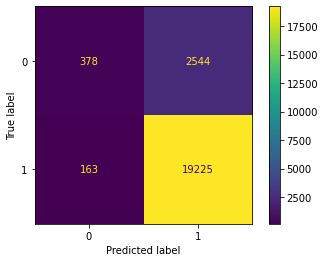

In [43]:
disp.plot()

In [44]:
#AUC area under the curve - useful for running multiple candidate models
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
import matplotlib.pyplot as plt

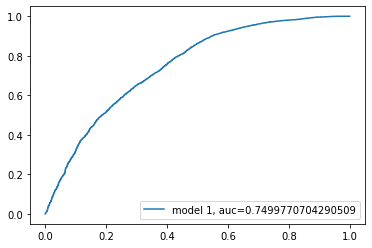

In [46]:
y_pred_probability=clf.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test, y_pred_probability)
auc=roc_auc_score(y_test,y_pred_probability)
plt.plot(fpr,tpr,label='model 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
#the closer to the line 1.0 on y axis the more accurate, below the line is good above the line is bad. so if its closer
#to the 

In [48]:
target_names = ['bad loans', 'good loans']
print(classification_report(y_test, y_pred, target_names=target_names))    
#support is number going in
#precision - (TP)/(TP+FP)
#recall - (TP)/TP+FN)
#f1 score (precision*recall)/(precision+recall)




              precision    recall  f1-score   support

   bad loans       0.70      0.13      0.22      2922
  good loans       0.88      0.99      0.93     19388

    accuracy                           0.88     22310
   macro avg       0.79      0.56      0.58     22310
weighted avg       0.86      0.88      0.84     22310



In [49]:
#11. pickling the code

In [50]:
clf

LogisticRegression(max_iter=300)

In [51]:
pwd   #where the code is being saved


'/Users/macbookpro/Documents/GitHub/IronAndy'

In [52]:
#create a folder in the current file structure
#11 import tools for pickles

In [53]:
import os 
import pickle

In [54]:
if (not os.path.exists('pickles/models')):
    os.makedirs('pickles/models')

In [55]:
pickle.dump(clf,open('pickles/models/trainedbankclassifier.pkl','wb'))  #creating the file in folder

In [56]:
#11.3 get pickle back for use

In [57]:
pwd


'/Users/macbookpro/Documents/GitHub/IronAndy'

In [58]:
pickles_path='pickles/'
model_path=pickles_path+'models/trainedbankclassifier.pkl'

In [61]:
model_clf=pickle.load(open(model_path, 'rb'))

In [62]:
model_clf

LogisticRegression(max_iter=300)